# 확률론 맛보기 

## 몬테카를로 추정

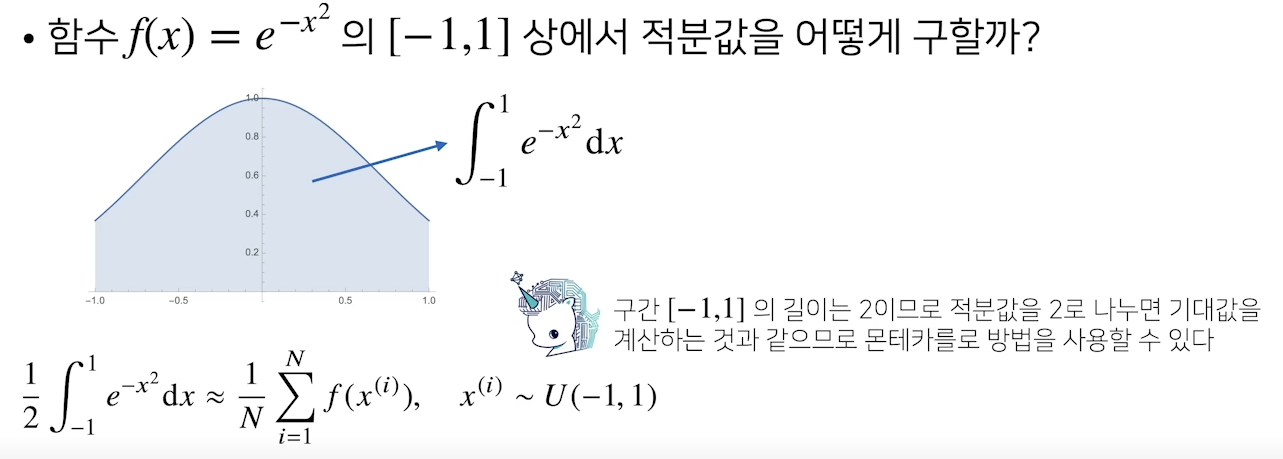

이 f(x)의 경우 해석적으로 구하기 힘들다. 

몬테카를로를 통해 수치적으로 구해보자. 

x를 uniform distribution에서 뽑고 이를 f(x)에 넣어 값을 구하고 단순히 이 f(x)의 mean을 수치적으로 구해 적분을 대체한다. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def mc_int(func, low, high, sample_size=100, repeat=10, plot_first_dist=True):
    integral_len = np.abs(high - low)
    stat = []
    
    for _ in range(repeat):
        x = np.random.uniform(low=low, high=high, size=sample_size)
        func_x = func(x)
        integral_value = integral_len * np.mean(func_x)
        stat.append(integral_value)
        
        if plot_first_dist:
            plt.scatter(x, [func(i) for i in x], alpha=0.3, s=0.5)
            plot_first_dist = False
            
    return np.mean(stat), np.std(stat)

def f_x(x):
    return np.exp(-x**2)

(1.4943233939745009, 0.012864824734972866)

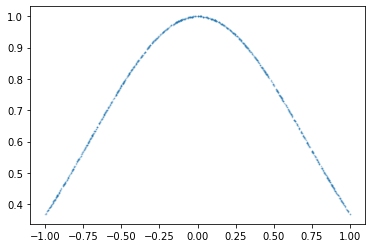

In [25]:
mc_int(f_x, low=-1, high=1, sample_size=1000, repeat=1000)